In [4]:
import math
from pprint import pprint
import requests
import statistics

import numpy as np
import torch
from transformers import AutoTokenizer

In [5]:
# 加载模型对应的分词器
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-1.7B")

tokenizer_config.json:   0%|          | 0.00/9.73k [00:00<?, ?B/s]

d:\Programs\Conda\envs\dml\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Cheap\.cache\huggingface\hub\models--Qwen--Qwen3-1.7B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

In [6]:
def chat_with_model(prompt, model="Qwen/Qwen3-1.7B", api_url="http://localhost:8999/v1/completions"):
    """
    Sends a request to the given API with the provided prompt.

    Args:
        prompt (str): The input prompt to send to the API.
        api_url (str): The URL of the API (default is "http://localhost:8999").

    Returns:
        dict: The response from the API as a dictionary.
    """
    request_data = {
        "model": model,
        "prompt": prompt,
        "temperature": 0.0,
        "max_tokens": 30,
        "logprobs": 1,
        "prompt_logprobs": 5,
    }

    try:
        response = requests.post(api_url, json=request_data,
                                  headers={"Content-Type": "application/json; charset=utf-8"}
                                  )
        response.raise_for_status()  # Raise an error for bad status codes
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

## Test

In [16]:
response = chat_with_model("我看不上他的演出")
print(response)
pprint(response["choices"][0].keys())
pprint(response["choices"][0]["logprobs"].keys())

{'id': 'cmpl-8c281d6016e84e94b6865f00c09d518d', 'object': 'text_completion', 'created': 1747795222, 'model': 'Qwen/Qwen3-1.7B', 'choices': [{'index': 0, 'text': '，但觉得他有潜力，这种情况下，如何表达自己的想法？\n\n在娱乐圈，尤其是像《声入人心》这样的节目，观众和', 'logprobs': {'text_offset': [0, 3, 6, 12, 15, 18, 24, 27, 33, 42, 45, 51, 57, 66, 72, 77, 80, 89, 92, 101, 104, 107, 110, 113, 119, 122, 131, 137, 140, 146], 'token_logprobs': [-0.3176453709602356, -2.3090012073516846, -3.2587082386016846, -0.7249027490615845, -2.456127405166626, -0.9839717149734497, -0.4621492624282837, -2.206357002258301, -1.315910816192627, -0.7827318906784058, -1.5246856212615967, -1.4747568368911743, -1.0465078353881836, -0.8562076091766357, -0.9833686947822571, -1.044744610786438, -2.3843994140625, -0.3180033266544342, -2.086414098739624, -1.55992591381073, -2.531832695007324, -1.9458783864974976, -0.03978973999619484, -7.199982064776123e-05, -0.0003057250869460404, -0.10644176602363586, -0.3301924467086792, -0.10982365161180496, -2.113126277923584,

In [17]:
response["choices"][0]["prompt_logprobs"]

[None,
 {'102777': {'logprob': -12.58481216430664,
   'rank': 45573,
   'decoded_token': 'ä¸įä¸Ĭ'},
  '25': {'logprob': -4.096531391143799, 'rank': 1, 'decoded_token': ':'},
  '102107': {'logprob': -5.034031391143799, 'rank': 2, 'decoded_token': 'è»Ĭ'},
  '74592': {'logprob': -5.502781391143799,
   'rank': 3,
   'decoded_token': 'STRACT'},
  '18348': {'logprob': -6.643406391143799, 'rank': 4, 'decoded_token': 'yz'},
  '104673': {'logprob': -6.901218891143799,
   'rank': 5,
   'decoded_token': 'åĵªä¸ª'}},
 {'100648': {'logprob': -5.624896049499512,
   'rank': 25,
   'decoded_token': 'ä»ĸçļĦ'},
  '3837': {'logprob': -2.0467710494995117, 'rank': 1, 'decoded_token': 'ï¼Į'},
  '101106': {'logprob': -2.8436460494995117,
   'rank': 2,
   'decoded_token': 'åĪ«äºº'},
  '99487': {'logprob': -3.0623960494995117,
   'rank': 3,
   'decoded_token': 'è¿Ļä¸ª'},
  '56568': {'logprob': -3.2186460494995117, 'rank': 4, 'decoded_token': 'ä½ł'},
  '99283': {'logprob': -3.3592710494995117,
   'rank': 5,
   '

In [18]:
for idx, tokens_list in enumerate(response["choices"][0]["prompt_logprobs"]):
    print(f"Token {idx}:")
    if not tokens_list:
        print("No tokens found.")
        continue
    for token_dict in tokens_list.values():
        print(token_dict)
        token = tokenizer.convert_tokens_to_string([token_dict["decoded_token"]])
        print(f"token: {token}, logprob: {token_dict['logprob']}, rank: {token_dict['rank']}")

Token 0:
No tokens found.
Token 1:
{'logprob': -12.58481216430664, 'rank': 45573, 'decoded_token': 'ä¸įä¸Ĭ'}
token: 不上, logprob: -12.58481216430664, rank: 45573
{'logprob': -4.096531391143799, 'rank': 1, 'decoded_token': ':'}
token: :, logprob: -4.096531391143799, rank: 1
{'logprob': -5.034031391143799, 'rank': 2, 'decoded_token': 'è»Ĭ'}
token: 車, logprob: -5.034031391143799, rank: 2
{'logprob': -5.502781391143799, 'rank': 3, 'decoded_token': 'STRACT'}
token: STRACT, logprob: -5.502781391143799, rank: 3
{'logprob': -6.643406391143799, 'rank': 4, 'decoded_token': 'yz'}
token: yz, logprob: -6.643406391143799, rank: 4
{'logprob': -6.901218891143799, 'rank': 5, 'decoded_token': 'åĵªä¸ª'}
token: 哪个, logprob: -6.901218891143799, rank: 5
Token 2:
{'logprob': -5.624896049499512, 'rank': 25, 'decoded_token': 'ä»ĸçļĦ'}
token: 他的, logprob: -5.624896049499512, rank: 25
{'logprob': -2.0467710494995117, 'rank': 1, 'decoded_token': 'ï¼Į'}
token: ，, logprob: -2.0467710494995117, rank: 1
{'logprob': -2

In [75]:
prompt = "他的唱功太差，我看不上他的演出"
response = chat_with_model(prompt)
pprint(response)

{'choices': [{'finish_reason': 'length',
              'index': 0,
              'logprobs': {'text_offset': [0,
                                           3,
                                           9,
                                           12,
                                           15,
                                           18,
                                           21,
                                           24,
                                           30,
                                           36,
                                           42,
                                           48,
                                           51,
                                           57,
                                           60,
                                           63,
                                           66,
                                           69,
                                           72,
                                           

In [31]:
def analyze_logprobs(response, debug=True):
    """
    Analyzes the log probabilities of tokens in a given logprobs dictionary.

    Args:
        response (dict): The response dictionary containing log probabilities.

    Returns:
        dict: A dictionary containing the average log probability and standard deviation.
    """
    if response and "choices" in response and response["choices"]:
        if debug:
            print(response["choices"][0].get("text", ""))
        tokens = response["choices"][0].get("logprobs", {}).get("tokens", [])
        logprobs = response["choices"][0].get("logprobs", {}).get("token_logprobs", [])
        if logprobs and tokens:
            # print("Tokens and their log probabilities:")
            # for i, (t, logprob) in enumerate(zip(tokens, logprobs)):
            #     token = tokenizer.convert_tokens_to_string([t])
            #     print(f"Token {i + 1}: \"{token}\", Log Probability: {logprob}")
            
            # Calculate perplexity
            avg_logprob = statistics.mean(logprobs)
            perplexity = math.exp(-avg_logprob)
            if debug:
                print(f"Perplexity: {perplexity}")
        else:
            print("No tokens or log probabilities found in the response.")
    else:
        print("Invalid response format.")

    return {
        "average_logprob": avg_logprob,
        "perplexity": perplexity,
    }

In [ ]:
prompt = "我看不上他的演出"
response = chat_with_model(prompt)
analyze_logprobs(response)

，但觉得他有潜力，这种情况下，如何表达自己的想法？

在娱乐圈，尤其是像《声入人心》这样的节目，观众和
Perplexity: 3.4368844366296845


{'average_logprob': -1.2345653739767537, 'perplexity': 3.4368844366296845}

In [22]:
# 可以消解歧义的上文 + 歧义句
prompt = "他的唱功太差了，我看不上他的演出"
response = chat_with_model(prompt)
analyze_logprobs(response)

。这句话的语法结构是怎样的？这句话的主语、谓语、宾语各是什么？

这句话的语法结构是怎样的？
Perplexity: 1.7319563309094352


{'average_logprob': -0.5492515967215998, 'perplexity': 1.7319563309094352}

In [23]:
# 无法消解歧义的上文 + 歧义句 （长度相同）
prompt = "音乐对我很重要。我看不上他的演出"
response = chat_with_model(prompt)
analyze_logprobs(response)

，但他的音乐作品却让我感到温暖。我曾经在一次音乐会上，听到他演奏的某首曲子，那首曲子
Perplexity: 3.0709699998558064


{'average_logprob': -1.121993472559067, 'perplexity': 3.0709699998558064}

In [24]:
prompt = "这里瓜真多"
response = chat_with_model(prompt)
analyze_logprobs(response)

# 可以消解歧义的上文 + 歧义句
prompt = "我太喜欢这个菜场了，这里瓜真多"
response = chat_with_model(prompt)
analyze_logprobs(response)

# 无法消解歧义的上文 + 歧义句 （长度相同）
prompt = "我太喜欢这个地方了，这里瓜真多"
response = chat_with_model(prompt)
analyze_logprobs(response)

，瓜田里有瓜，瓜田里有瓜，瓜田里有瓜，瓜田里有瓜，瓜田里有瓜
Perplexity: 1.810201661023859
，瓜类蔬菜，还有各种各样的水果，还有各种各样的小吃，还有各种各样的水产，还有各种各样的肉类，还有
Perplexity: 2.931617843755011
，瓜田里还有小动物，我最喜欢的是西瓜，我最喜欢的是西瓜，我最喜欢的是西瓜，我最喜欢的是西瓜，我最喜欢
Perplexity: 2.388160946949572


{'average_logprob': -0.8705235914792866, 'perplexity': 2.388160946949572}

In [26]:
prompt = "这份报告我写不好"
response = chat_with_model(prompt)
analyze_logprobs(response)

# 可以消解歧义的上文 + 歧义句
prompt = "我爸的公司跟他们有过合作，这份报告我写不好"
response = chat_with_model(prompt)
analyze_logprobs(response)

# 无法消解歧义的上文 + 歧义句 （长度相同）
prompt = "我不能接收这个任务，说实话这份报告我写不好"
response = chat_with_model(prompt)
analyze_logprobs(response)

prompt = "哈哈哈哈哈哈哈哈哈哈哈哈哈这份报告我写不好"
response = chat_with_model(prompt)
analyze_logprobs(response)

prompt = "            这份报告我写不好"
response = chat_with_model(prompt)
analyze_logprobs(response)

，我需要你帮我润色一下，让语言更流畅，逻辑更清晰，结构更合理。报告题目：基于深度学习的图像
Perplexity: 2.444412273457222
，我该怎么处理？我应该怎么写这份报告？我应该怎么和他们沟通？我应该怎么处理这个关系？我应该怎么处理这个关系？我
Perplexity: 3.8799082839637538
，我需要你帮我写一份，我需要你帮我写一份，我需要你帮我写一份，我需要你帮我写一份，我
Perplexity: 2.044772962288875
，我需要你帮我修改一下，让报告更专业、更清晰、更简洁。报告内容是关于“基于深度学习的图像识别
Perplexity: 3.8008501977488054
，我需要你帮我修改一下。我需要你帮我把报告的结构和内容重新组织，让报告更清晰、逻辑更严密，
Perplexity: 3.0210471123261198


{'average_logprob': -1.105603497227033, 'perplexity': 3.0210471123261198}

## Evaluation

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
from tqdm import tqdm

In [34]:
# Read Dataset from local CSV file
df = pd.read_csv("../RAG/data/original_new.csv")
print(df.columns)

keep_columns = [
    '歧义句',
    '歧义句及上下文',
    '歧义文本位置',
    '歧义原因（解读选项）',
    '歧义句消岐1',
    '歧义句消岐2',
    '歧义类型'
]
df = df[keep_columns]   

pprint(df.head())
print("length of df:", len(df))

Index(['歧义句', '歧义句及上下文', '歧义文本位置', '歧义原因（解读选项）', '歧义句消岐1', '歧义句消岐2', '歧义句消岐3',
       '歧义句消岐4', '歧义类型', '是否删除'],
      dtype='object')
          歧义句                       歧义句及上下文 歧义文本位置  \
0   枝头上的杜鹃很漂亮          小明走在公园里，赞叹枝头上的杜鹃很漂亮。     杜鹃   
1   我们需要组织人员。     接到紧急通知后，领导简单地宣布：我们需要组织人员。   组织人员   
2  把文件放这吧明天处理          快下班了，同事说：把文件放这吧明天处理。  把文件放这   
3    他是一只老狐狸。  别被他的外表骗了，他是一只老狐狸，玩心眼儿可是一把好手。    老狐狸   
4    她是一只小白兔。       她是一只小白兔，初入职场的她对一切都充满好奇。    小白兔   

                             歧义原因（解读选项）                               歧义句消岐1  \
0                       杜鹃可以指杜鹃花也可以指杜鹃鸟                小明走在公园里，赞叹枝头上的杜鹃花很漂亮。   
1   组织人员可以指把人员组织起来这个行为，也可以指职能为组织管理的的人员。          接到紧急通知后，领导简单地宣布：我们需要组织一些人员。   
2  把文件放这可以指物理空间的的某个位置，也可以指行为上先搁置文件处理这件事       快下班了，同事指着桌子说：把文件放这（桌子上）吧明天处理。    
3        “老狐狸”可以形容人很狡猾，也可以是字面意思“年老的狐狸”。  别被他的外表骗了，他是一个像老狐狸一样狡猾的人，玩心眼儿可是一把好手。   
4          “小白兔”可以比喻人很单纯，也可以是字面意思“小白兔”。       她是一个像小白兔一样单纯的人，初入职场的她对一切都充满好奇。   

                                              歧义句消岐2      歧

In [13]:
import re

def clip_str(s, str_keep):
    # 用 re.finditer 找到所有 str1 出现的位置
    matches = list(re.finditer(re.escape(str_keep), s))
    if not matches:
        return ' ' * len(s)

    result = [' '] * len(s)  # 初始化为全空格
    for match in matches:
        start, end = match.span()
        result[start:end] = str_keep  # 保留 str1

    return ''.join(result)

# 示例
s = "abc123def123ghi"
str_keep = "123"
new_s = clip_str(s, str_keep)
print(new_s)  # 输出: "   123   123   "

   123   123   


In [ ]:
def evaluate_ambiguity(df, model="Qwen/Qwen3-1.7B", api_url="http://localhost:8999/v1/completions"):
    """
    Evaluates the ambiguity of sentences in the DataFrame using a language model.

    Args:
        df (pd.DataFrame): The DataFrame containing sentences to evaluate.
        model (str): The model name to use for evaluation.

    Returns:
        pd.DataFrame: The DataFrame with added columns for perplexity and log probabilities.
    """
    df = df.copy()

    def process_row(index, row):
        if pd.isna(row['歧义句']) or pd.isna(row['歧义句消岐1']) or pd.isna(row['歧义句消岐2']):
            return index, None, None, None

        print(f"Processing sentence {index}: {row['歧义句']}")

        prompt = row['歧义句']
        response = chat_with_model(prompt, model=model)
        if response:
            analysis = analyze_logprobs(response, debug=False)
            perplexity = analysis["perplexity"]
        else:
            perplexity = None

        prompt = row['歧义句消岐1']
        response = chat_with_model(prompt, model=model)
        if response:
            analysis = analyze_logprobs(response, debug=False)
            disambiguated_perplexity_1 = analysis["perplexity"]
        else:
            disambiguated_perplexity_1 = None

        prompt = row['歧义句'].rjust(len(row['歧义句消岐1']), ' ')  # pad to the same length
        response = chat_with_model(prompt, model=model)
        if response:
            analysis = analyze_logprobs(response, debug=False)
            perplexity_1 = analysis["perplexity"]
        else:
            perplexity_1 = None
        
        return index, perplexity, perplexity_1, disambiguated_perplexity_1

    results = []
    with ThreadPoolExecutor(max_workers=64) as executor:
        results = list(executor.map(lambda item: process_row(item[0], item[1]), df.iterrows()))
    print(results)

    for index, p, p1, da_p1 in results:
        df.loc[index, 'perplexity'] = p
        df.loc[index, 'perplexity_1'] = p1
        df.loc[index, 'disambiguated_perplexity_1'] = da_p1

    model_name = model.split("/")[-1]
    df.to_csv(f"results/results_{model_name}.csv", index=False, encoding='utf-8-sig')
    return df

# result_qwen3_17 = evaluate_ambiguity(df, model="Qwen/Qwen3-1.7B")
# pprint(result_qwen3_17[['歧义句', 'perplexity']].head())

In [ ]:
result_qwen3_06 = evaluate_ambiguity(df, model="Qwen/Qwen3-0.6B", api_url="http://localhost:8999/v1/completions")
result_qwen3_17 = evaluate_ambiguity(df, model="Qwen/Qwen3-1.7B", api_url="http://localhost:8999/v1/completions")
result_qwen3_8 = evaluate_ambiguity(df, model="Qwen/Qwen3-8B", api_url="http://localhost:8999/v1/completions")

Processing sentence 0: 枝头上的杜鹃很漂亮
Processing sentence 1: 我们需要组织人员。
Processing sentence 2: 把文件放这吧明天处理
Processing sentence 3: 他是一只老狐狸。
Processing sentence 4: 她是一只小白兔。
Processing sentence 5: 他走了一个多小时了。
Processing sentence 6: 方大同离开了我们。
Processing sentence 7: 这辆车没有锁。
Processing sentence 8: 他倒了一杯水。
Processing sentence 9: 店里来了三个报社的记者。
Processing sentence 10: 我要热饭。
Processing sentence 11: 他想起来了。
Processing sentence 12: 他的包袱很重。
Processing sentence 13: 小李上课去了。
Processing sentence 14: 他在桌子上写字
Processing sentence 15: 我要炒鸡蛋
Processing sentence 16: 他爬过山没有
Processing sentence 17: 老王在火车上画广告
Processing sentence 18: 他原来住在这里
Processing sentence 19: 她今天脸色不太好
Processing sentence 20: 不会造句子
Processing sentence 21: 他背着总经理和副总经理偷偷地把这笔钱分别存入了两家银行。
Processing sentence 22: 看了病人
Processing sentence 23: 就听到有人叫他
Processing sentence 24: 热爱人民的军队
Processing sentence 25: 老师和学生中的一部分参加了这次活动
Processing sentence 26: 妹妹找不到爸爸妈妈心里很着急
Processing sentence 27: 这是一位知识十分渊博的王老师的学生
Processing sentence 28: 桌上放着许多朋友送来的礼物
Processing senten

## Summary

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
pprint(result_qwen3_17[['歧义句', 'perplexity', 'perplexity_1', 'disambiguated_perplexity_1']].head())

          歧义句  perplexity  perplexity_1  disambiguated_perplexity_1
0   枝头上的杜鹃很漂亮    2.204412      3.859894                    2.308124
1   我们需要组织人员。    2.060888      5.006652                    4.037888
2  把文件放这吧明天处理    1.748663      2.792629                    2.834039
3    他是一只老狐狸。    2.444464      1.708163                    4.208153
4    她是一只小白兔。    1.935344      1.897724                    2.795406


In [8]:
result_qwen3_06 = pd.read_csv("results/results_Qwen3-0.6B.csv")
result_qwen3_17 = pd.read_csv("results/results_Qwen3-1.7B.csv")
result_qwen3_8 = pd.read_csv("results/results_Qwen3-8B.csv")

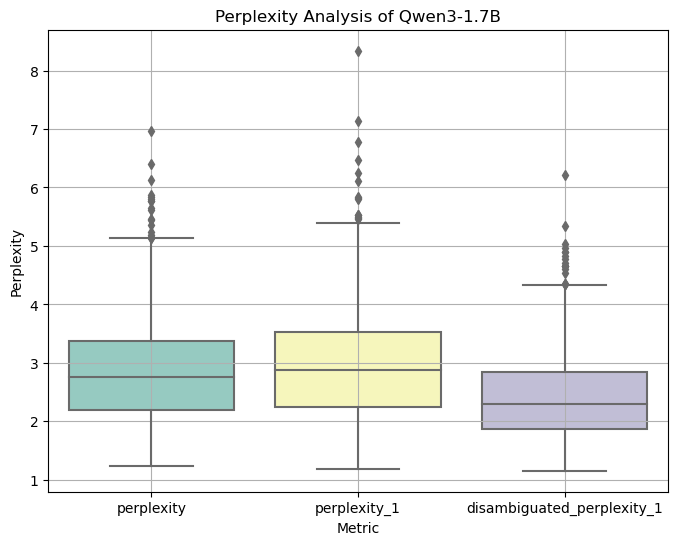

In [9]:
def plot(data, model):
    # print(data.head())
    model_name = model.split("/")[-1]
    data_long = data.melt(var_name='Metric', value_name='Perplexity')

    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(data=data_long, x='Metric', y='Perplexity', palette="Set3")    

    # # 计算并注释中位数和均值
    # for i, metric in enumerate(['perplexity', 'perplexity_1', 'disambiguated_perplexity_1']):
    #     col_data = data[metric].dropna()
    #     median = col_data.median()
    #     mean = col_data.mean()

    #     # 注释在箱线图上方
    #     ax.text(i, median, f"Median: {median:.2f}", ha='center', va='bottom', color='blue')
    #     ax.text(i, mean, f"Mean: {mean:.2f}", ha='center', va='top', color='red')

    plt.title(f"Perplexity Analysis of {model_name}")
    plt.grid(True)
    plt.savefig(f"results/results_{model_name}.png")
    plt.show()
    
    
plot(result_qwen3_17[['perplexity', 'perplexity_1', 'disambiguated_perplexity_1']], "Qwen/Qwen3-1.7B")

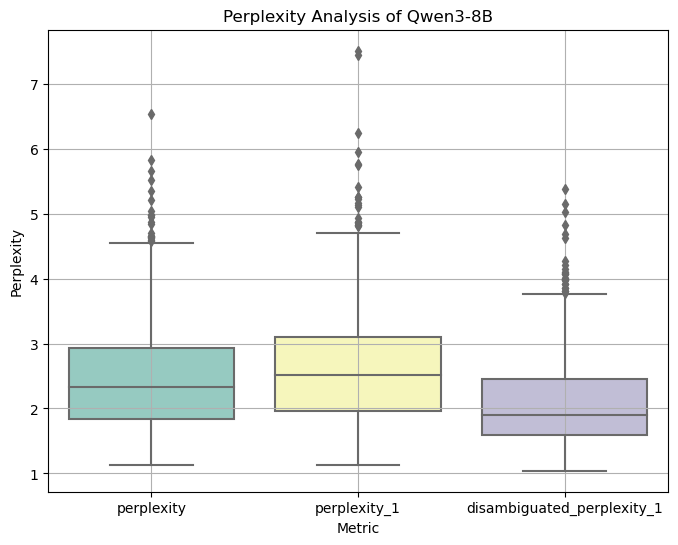

In [64]:
plot(result_qwen3_8[['perplexity', 'perplexity_1', 'disambiguated_perplexity_1']], "Qwen/Qwen3-8B")

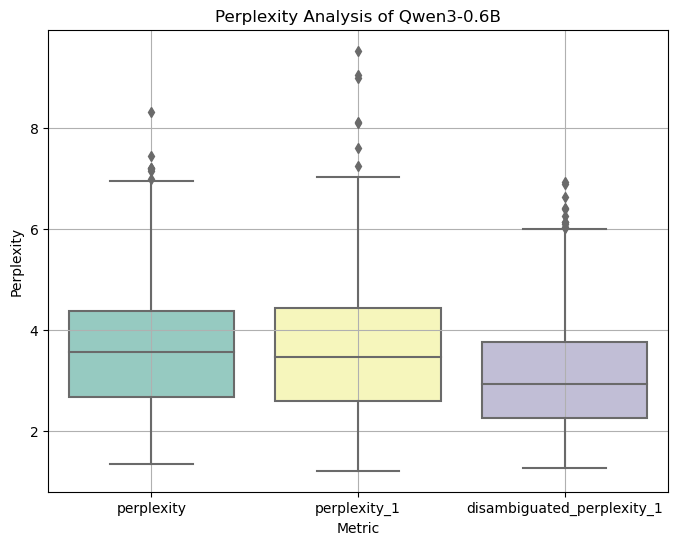

In [66]:
plot(result_qwen3_06[['perplexity', 'perplexity_1', 'disambiguated_perplexity_1']], "Qwen/Qwen3-0.6B")

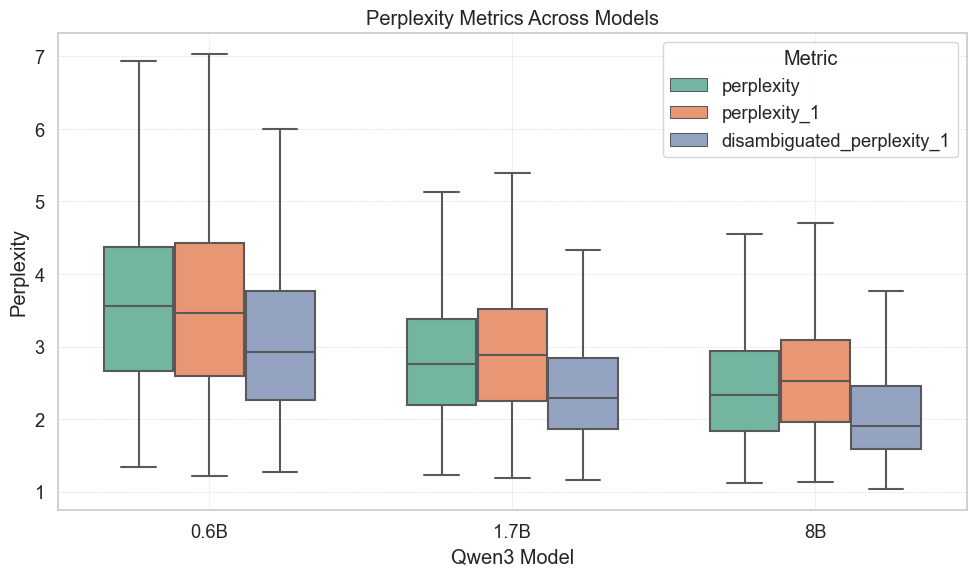

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 准备数据
df1 = result_qwen3_06[['perplexity', 'perplexity_1', 'disambiguated_perplexity_1']].copy()
df2 = result_qwen3_17[['perplexity', 'perplexity_1', 'disambiguated_perplexity_1']].copy()
df3 = result_qwen3_8[['perplexity', 'perplexity_1', 'disambiguated_perplexity_1']].copy()

df1['model'] = '0.6B'
df2['model'] = '1.7B'
df3['model'] = '8B'

# 合并
df_all = pd.concat([df1, df2, df3])

# 转成长格式
df_long = pd.melt(df_all, id_vars='model', var_name='metric', value_name='value')

# 设置风格
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_long,
    x='model',        # x 轴是模型名
    y='value',
    hue='metric',     # 用指标区分颜色
    palette='Set2',
    showfliers=False,
    width=0.7
)

plt.title("Perplexity Metrics Across Models")
plt.xlabel("Qwen3 Model")
plt.ylabel("Perplexity")
plt.legend(title='Metric')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()

plt.savefig("results/perplexity_comparison_all", dpi=300)
plt.show()
